In [1]:
%load_ext autoreload
%autoreload 2

import transformer_lens

from lexical_reflections.utils.device import DEVICE

model = transformer_lens.HookedTransformer.from_pretrained("Qwen/Qwen2.5-0.5B", device=DEVICE)

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


Loaded pretrained model Qwen/Qwen2.5-0.5B into HookedTransformer


In [2]:
import json

toy_data = None
with open("../../data/toy_data.json") as f:
    toy_data = json.load(f)

Data len:  11


  0%|          | 0/11 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 11/11 [00:08<00:00,  1.35it/s]


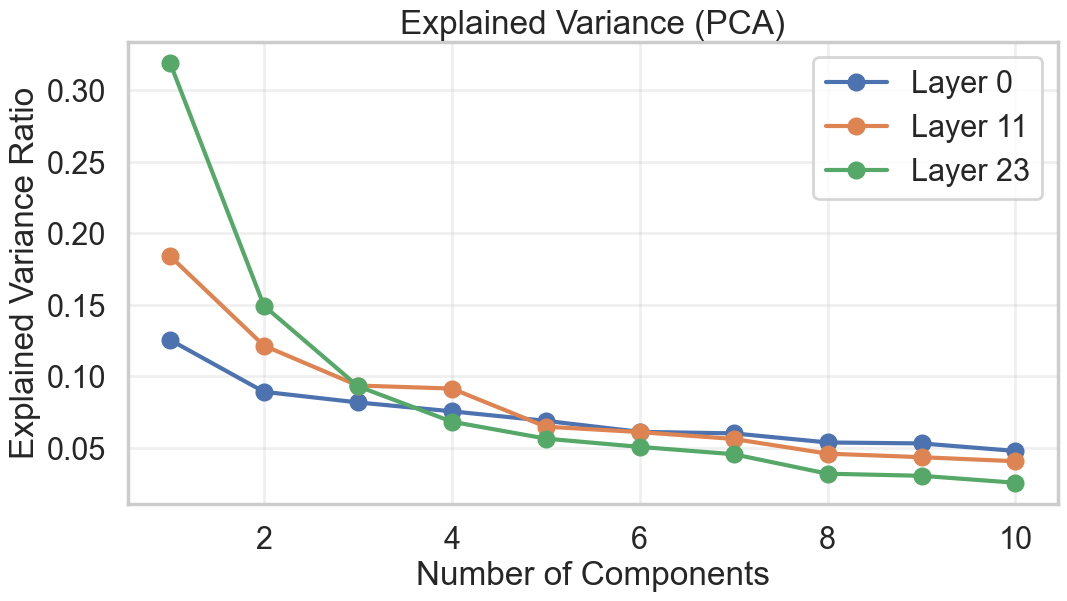

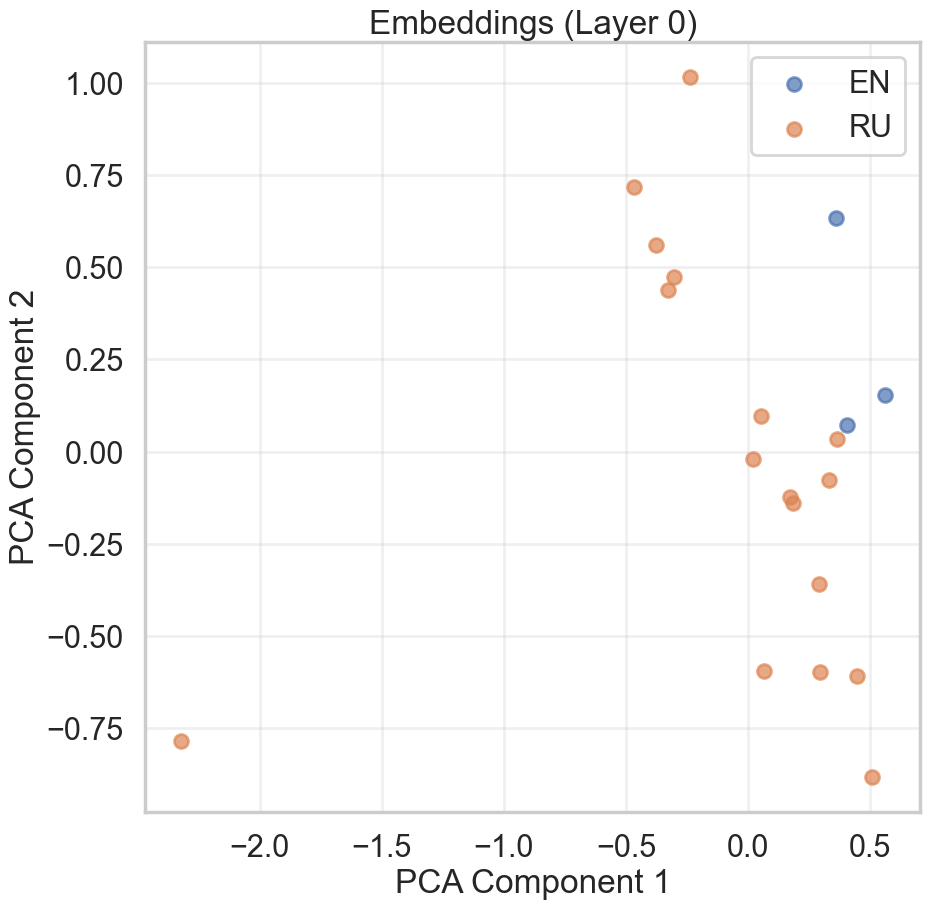

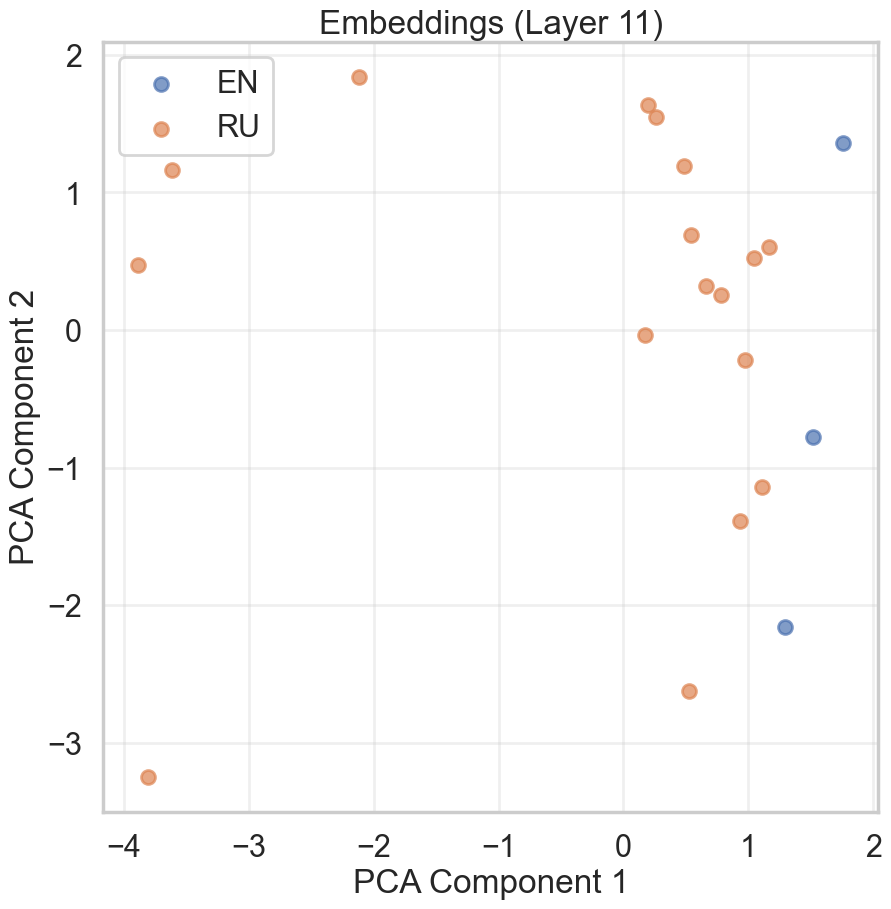

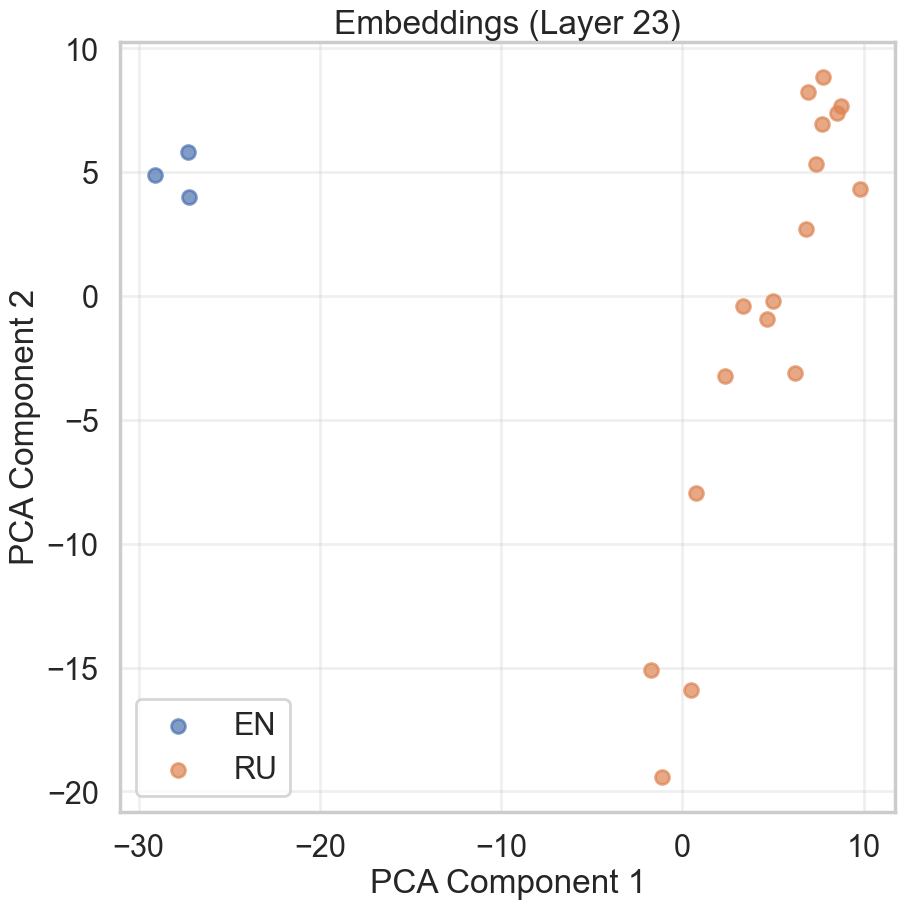

In [3]:
from lexical_reflections.gather_data.activation_cache import collect_activation_cache
from lexical_reflections.pca.analyze import find_lexical_subspace_intersection
from lexical_reflections.pca.visualize import visualize_projections

cache = collect_activation_cache(model, toy_data)
projections, hidden_space_by_language = find_lexical_subspace_intersection(model, cache)

visualize_projections(hidden_space_by_language, projections)